Ver 0.2:

adjust model imbalanced output weight

## adjust imbalanced output weight

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, AveragePooling1D, Dropout
from keras.layers import BatchNormalization, Activation
from keras.initializers import VarianceScaling
from keras.optimizers import Adam
from keras.utils import np_utils
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
np.set_printoptions(suppress=True)

trainD = np.load("/home/hsiehch/30s/train_data.npy")
trainL = np.load("/home/hsiehch/30s/train_label.npy")
validationD = np.load("/home/hsiehch/30s/validation_data.npy")
validationL = np.load("/home/hsiehch/30s/validation_label.npy")
testD = np.load("/home/hsiehch/30s/test_data.npy")
testL = np.load("/home/hsiehch/30s/test_label.npy")

trainData = trainD.reshape((trainD.shape[0], trainD.shape[1], 1))
trainLabel = np_utils.to_categorical(trainL, 4)
validationData = validationD.reshape((validationD.shape[0], validationD.shape[1], 1))
validationLabel = np_utils.to_categorical(validationL, 4)
testData = testD.reshape((testD.shape[0], testD.shape[1], 1))
testLabel = np_utils.to_categorical(testL, 4)
print('Train Data:', trainData.shape)
print('Train Label: ', trainLabel.shape)
print('Vali Data: ', validationData.shape)
print('Vali Label: ', validationLabel.shape)
print('Test Data: ', testData.shape)
print('Test Label: ', testLabel.shape)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train Data: (5078, 9000, 1)
Train Label:  (5078, 4)
Vali Data:  (2032, 9000, 1)
Vali Label:  (2032, 4)
Test Data:  (3041, 9000, 1)
Test Label:  (3041, 4)


In [5]:
cw = class_weight.compute_sample_weight('balanced', [0,1,2,3], trainL)
print(cw)

[2.80862832 8.46333333 0.42600671 0.84859626]


In [7]:
a = np.array([ 452.,  150., 2980., 1496.])
b = np.array([2.80862832, 8.46333333, 0.42600671, 0.84859626])
print(a*b)

[1269.50000064 1269.4999995  1269.4999958  1269.50000496]


In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, AveragePooling1D, Dropout
from keras.layers import BatchNormalization, Activation
from keras.optimizers import Adam
from keras.utils import np_utils
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
np.set_printoptions(suppress=True)

trainD = np.load("/home/hsiehch/30s/train_data.npy")
trainL = np.load("/home/hsiehch/30s/train_label.npy")
validationD = np.load("/home/hsiehch/30s/validation_data.npy")
validationL = np.load("/home/hsiehch/30s/validation_label.npy")
testD = np.load("/home/hsiehch/30s/test_data.npy")
testL = np.load("/home/hsiehch/30s/test_label.npy")

trainData = trainD.reshape((trainD.shape[0], trainD.shape[1], 1))
trainLabel = np_utils.to_categorical(trainL, 4)
validationData = validationD.reshape((validationD.shape[0], validationD.shape[1], 1))
validationLabel = np_utils.to_categorical(validationL, 4)
testData = testD.reshape((testD.shape[0], testD.shape[1], 1))
testLabel = np_utils.to_categorical(testL, 4)

cw = class_weight.compute_sample_weight('balanced', [0,1,2,3], trainL)

print('Train Data:', trainData.shape)
print('Train Label: ', trainLabel.shape)
print('Vali Data: ', validationData.shape)
print('Vali Label: ', validationLabel.shape)
print('Test Data: ', testData.shape)
print('Test Label: ', testLabel.shape)


try:
    model and parallel_model
except NameError:
    print("Good to go!")
    pass
else:   
    if model:
        del model
        del parallel_model
    print("Object has been cleaned!")


model = Sequential()
model.add(Conv1D(filters = 32, kernel_size = 7, input_shape = (trainData.shape[1], 1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 32, kernel_size = 7))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 64, kernel_size = 7))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 64, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 128, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 128, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))

model.add(Conv1D(filters = 256, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 256, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))

model.add(Conv1D(filters = 512, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))

model.add(Conv1D(filters = 512, kernel_size = 3))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(4, activation = "softmax"))

print(model.summary())

adam = Adam(lr = 0.001)
model.compile(optimizer = adam, loss = "categorical_crossentropy", metrics=['accuracy'])

cw = {0: cw[0],
      1: cw[1],
      2: cw[2],
      3: cw[3]}
# class_weight = class_weight.compute_sample_weight('balanced', [0,1,2,3], trainL)
early_stop = EarlyStopping(patience=20)
train_history_1 = model.fit(x = trainData,
                            y = trainLabel,
                            epochs=150,
                            validation_data=(validationData, validationLabel),
                            callbacks=[early_stop],
                            class_weight=cw,
                            batch_size=70, 
                            verbose=1)

evaluation = model.evaluate(x = testData, y = testLabel)
print('Loss: {:.3f}, Accuracy: {:.3f}'.format(evaluation[0], evaluation[1]))


import pylab as plt
def history_display(hist, train, validation):
    plt.plot(hist.history[train])
    plt.plot(hist.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
    
def show_plot(flag, hist):
    if flag == 'acc':
        history_display(hist, 'acc', 'val_acc')
    elif flag == 'loss':
        history_display(hist, 'loss', 'val_loss')
    else:
        print('Invalid!')


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train Data: (5078, 9000, 1)
Train Label:  (5078, 4)
Vali Data:  (2032, 9000, 1)
Vali Label:  (2032, 4)
Test Data:  (3041, 9000, 1)
Test Label:  (3041, 4)
Good to go!
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 8994, 32)          256       
_________________________________________________________________
activation_1 (Activation)    (None, 8994, 32)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8994, 32)          128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4497, 32)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4491, 32)          7200      
_________________________________________________________________
activation_2 (Activation)    (None, 4491, 

5078/5078 [==============================] - 5s 906us/step - loss: 0.9621 - acc: 0.3429 - val_loss: 1.1380 - val_acc: 0.3701
Epoch 21/150
5078/5078 [==============================] - 5s 962us/step - loss: 0.9486 - acc: 0.3986 - val_loss: 1.6964 - val_acc: 0.1225
Epoch 22/150
5078/5078 [==============================] - 5s 918us/step - loss: 0.9908 - acc: 0.3736 - val_loss: 1.2168 - val_acc: 0.3263
Epoch 23/150
5078/5078 [==============================] - 5s 907us/step - loss: 0.9991 - acc: 0.3423 - val_loss: 1.1580 - val_acc: 0.3007
Epoch 24/150
5078/5078 [==============================] - 5s 976us/step - loss: 1.0048 - acc: 0.4130 - val_loss: 1.5482 - val_acc: 0.1339
Epoch 25/150
5078/5078 [==============================] - 5s 909us/step - loss: 0.9512 - acc: 0.4275 - val_loss: 1.0900 - val_acc: 0.5025
Epoch 26/150
5078/5078 [==============================] - 5s 910us/step - loss: 0.9136 - acc: 0.4898 - val_loss: 1.5214 - val_acc: 0.2111
Epoch 27/150
5078/5078 [=======================

Confusion matrix, without normalization


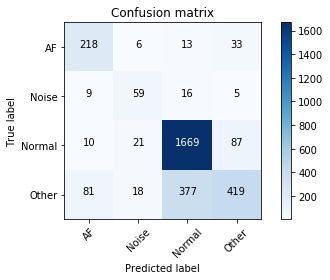

In [4]:
from toolkit import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
test_prediction = model.predict_classes(testData, batch_size=1)
cnf_matrix = confusion_matrix(testL, test_prediction)
plot_confusion_matrix.plot_confusion_matrix(cnf_matrix, classes=['AF','Noise','Normal','Other'], save_png=False)

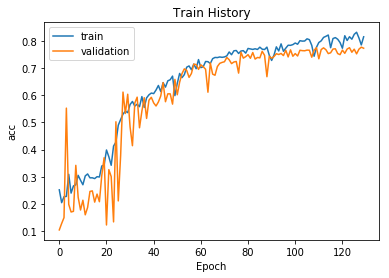

In [2]:
show_plot('acc', train_history_1)

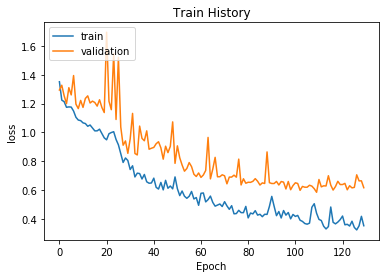

In [3]:
show_plot('loss', train_history_1)

## oversampling (random selection)

[The Right Way to Oversample in Predictive Modeling](https://beckernick.github.io/oversampling-modeling/)

[Class Imbalance Problem](http://www.chioka.in/class-imbalance-problem/)

[random seed](https://blog.csdn.net/yangyiwxl/article/details/71641355)

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, AveragePooling1D, Dropout
from keras.layers import BatchNormalization, Activation
from keras.optimizers import Adam
from keras.utils import np_utils
import tensorflow as tf
from keras.callbacks import EarlyStopping
np.set_printoptions(suppress=True)

trainD = np.load("/home/hsiehch/30s/train_data.npy")
trainL = np.load("/home/hsiehch/30s/train_label.npy")
validationD = np.load("/home/hsiehch/30s/validation_data.npy")
validationL = np.load("/home/hsiehch/30s/validation_label.npy")
testD = np.load("/home/hsiehch/30s/test_data.npy")
testL = np.load("/home/hsiehch/30s/test_label.npy")

trainData = trainD.reshape((trainD.shape[0], trainD.shape[1], 1))
trainLabel = np_utils.to_categorical(trainL, 4)
validationData = validationD.reshape((validationD.shape[0], validationD.shape[1], 1))
validationLabel = np_utils.to_categorical(validationL, 4)
testData = testD.reshape((testD.shape[0], testD.shape[1], 1))
testLabel = np_utils.to_categorical(testL, 4)

print('Train Data:', trainData.shape)
print('Train Label: ', trainLabel.shape)
print('Vali Data: ', validationData.shape)
print('Vali Label: ', validationLabel.shape)
print('Test Data: ', testData.shape)
print('Test Label: ', testLabel.shape)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train Data: (5078, 9000, 1)
Train Label:  (5078, 4)
Vali Data:  (2032, 9000, 1)
Vali Label:  (2032, 4)
Test Data:  (3041, 9000, 1)
Test Label:  (3041, 4)


In [2]:
from imblearn.over_sampling import SMOTE
# sm = SMOTE(sampling_strategy = {0:2980, 1:2980, 2:2980, 3:2980}, random_state=12)
sm = SMOTE(sampling_strategy = 'auto', random_state=12)
x_res, y_res = sm.fit_sample(trainD, trainL)

In [3]:
x_res = x_res.reshape((x_res.shape[0], x_res.shape[1], 1))
y_res = np_utils.to_categorical(y_res, 4)

In [4]:
y_res.shape

(11920, 4)

In [5]:
#classes=['AF','Noise','Normal','Other']
sum(y_res)

array([2980., 2980., 2980., 2980.], dtype=float32)

In [9]:
try:
    model and parallel_model
except NameError:
    print("Good to go!")
    pass
else:   
    if model:
        del model
        del parallel_model
    print("Object has been cleaned!")


model = Sequential()
model.add(Conv1D(filters = 32, kernel_size = 7, input_shape = (trainData.shape[1], 1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 32, kernel_size = 7))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 32, kernel_size = 7))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 32, kernel_size = 5))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 32, kernel_size = 5))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 32, kernel_size = 5))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))

model.add(Conv1D(filters = 64, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 64, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))

model.add(Conv1D(filters = 64, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))

model.add(Conv1D(filters = 128, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 128, kernel_size = 3))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(4, activation = "softmax"))

print(model.summary())

adam = Adam(lr = 0.001)
model.compile(optimizer = adam, loss = "categorical_crossentropy", metrics=['accuracy'])

early_stop = EarlyStopping(patience=20)
train_history_1 = model.fit(x = x_res,
                            y = y_res,
                            epochs=150,
                            validation_data=(validationData, validationLabel),
                            callbacks=[early_stop],
                            batch_size=70, 
                            verbose=1)

evaluation = model.evaluate(x = testData, y = testLabel)
print('Loss: {:.3f}, Accuracy: {:.3f}'.format(evaluation[0], evaluation[1]))


import pylab as plt
def history_display(hist, train, validation):
    plt.plot(hist.history[train])
    plt.plot(hist.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
    
def show_plot(flag, hist):
    if flag == 'acc':
        history_display(hist, 'acc', 'val_acc')
    elif flag == 'loss':
        history_display(hist, 'loss', 'val_loss')
    else:
        print('Invalid!')

Good to go!
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_31 (Conv1D)           (None, 8994, 32)          256       
_________________________________________________________________
activation_31 (Activation)   (None, 8994, 32)          0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 8994, 32)          128       
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 4497, 32)          0         
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 4491, 32)          7200      
_________________________________________________________________
activation_32 (Activation)   (None, 4491, 32)          0         
_________________________________________________________________
max_pooling1d_29 (MaxPooling (None, 2245, 32)          0        

11920/11920 [==============================] - 8s 693us/step - loss: 0.3791 - acc: 0.8571 - val_loss: 0.7421 - val_acc: 0.7328
Epoch 19/150
11920/11920 [==============================] - 8s 680us/step - loss: 0.3778 - acc: 0.8607 - val_loss: 0.6798 - val_acc: 0.7505
Epoch 20/150
11920/11920 [==============================] - 8s 697us/step - loss: 0.3551 - acc: 0.8637 - val_loss: 0.6653 - val_acc: 0.7544
Epoch 21/150
11920/11920 [==============================] - 8s 690us/step - loss: 0.3532 - acc: 0.8698 - val_loss: 0.6948 - val_acc: 0.7702
Epoch 22/150
11920/11920 [==============================] - 8s 696us/step - loss: 0.3528 - acc: 0.8674 - val_loss: 0.6645 - val_acc: 0.7746
Epoch 23/150
11920/11920 [==============================] - 8s 695us/step - loss: 0.3385 - acc: 0.8768 - val_loss: 0.7099 - val_acc: 0.7584
Epoch 24/150
11920/11920 [==============================] - 8s 697us/step - loss: 0.3363 - acc: 0.8769 - val_loss: 0.6146 - val_acc: 0.7913
Epoch 25/150
11920/11920 [=======

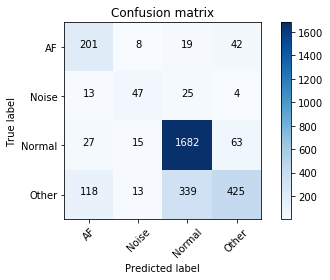

In [12]:
from toolkit import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
test_prediction = model.predict_classes(testData, batch_size=1)
cnf_matrix = confusion_matrix(testL, test_prediction)
plot_confusion_matrix.plot_confusion_matrix(cnf_matrix, classes=['AF','Noise','Normal','Other'], save_png=False)

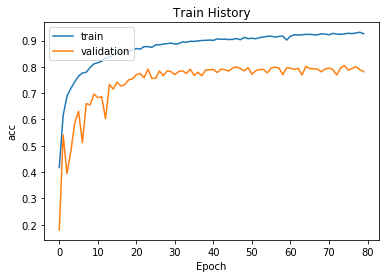

In [10]:
show_plot('acc', train_history_1)

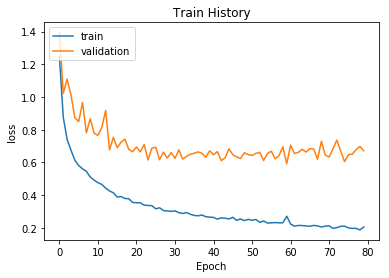

In [11]:
show_plot('loss', train_history_1)

## 3 classes

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, AveragePooling1D, Dropout
from keras.layers import BatchNormalization, Activation
from keras.optimizers import Adam
from keras.utils import np_utils
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
from toolkit import to_3_classes
np.set_printoptions(suppress=True)

trainD = np.load("/home/hsiehch/30s/train_data.npy")
trainL = np.load("/home/hsiehch/30s/train_label.npy")
validationD = np.load("/home/hsiehch/30s/validation_data.npy")
validationL = np.load("/home/hsiehch/30s/validation_label.npy")
testD = np.load("/home/hsiehch/30s/test_data.npy")
testL = np.load("/home/hsiehch/30s/test_label.npy")

trainL = to_3_classes.to_3_classes(trainL)
validationL = to_3_classes.to_3_classes(validationL)
testL = to_3_classes.to_3_classes(testL)

trainData = trainD.reshape((trainD.shape[0], trainD.shape[1], 1))
trainLabel = np_utils.to_categorical(trainL, 3)
validationData = validationD.reshape((validationD.shape[0], validationD.shape[1], 1))
validationLabel = np_utils.to_categorical(validationL, 3)
testData = testD.reshape((testD.shape[0], testD.shape[1], 1))
testLabel = np_utils.to_categorical(testL, 3)

cw = class_weight.compute_sample_weight('balanced', [0,1,2], trainL)

print('Train Data:', trainData.shape)
print('Train Label: ', trainLabel.shape)
print('Vali Data: ', validationData.shape)
print('Vali Label: ', validationLabel.shape)
print('Test Data: ', testData.shape)
print('Test Label: ', testLabel.shape)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train Data: (5078, 9000, 1)
Train Label:  (5078, 3)
Vali Data:  (2032, 9000, 1)
Vali Label:  (2032, 3)
Test Data:  (3041, 9000, 1)
Test Label:  (3041, 3)


In [2]:
try:
    model
except NameError:
    print("Good to go!")
    pass
else:   
    if model:
        del model
    print("Object has been cleaned!")


model = Sequential()
model.add(Conv1D(filters = 32, kernel_size = 7, input_shape = (trainData.shape[1], 1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 32, kernel_size = 7))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 64, kernel_size = 7))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 64, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 128, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 128, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))

model.add(Conv1D(filters = 256, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 256, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))

model.add(Conv1D(filters = 512, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))

model.add(Conv1D(filters = 512, kernel_size = 3))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(3, activation = "softmax"))

print(model.summary())

adam = Adam(lr = 0.0005)
model.compile(optimizer = adam, loss = "categorical_crossentropy", metrics=['accuracy'])

cw = {0: cw[0],
      1: cw[1],
      2: cw[2]}
early_stop = EarlyStopping(patience=20)
train_history_1 = model.fit(x = trainData,
                            y = trainLabel,
                            epochs=150,
                            validation_data=(validationData, validationLabel),
                            callbacks=[early_stop],
                            class_weight=cw,
                            batch_size=70, 
                            verbose=1)

evaluation = model.evaluate(x = testData, y = testLabel)
print('Loss: {:.3f}, Accuracy: {:.3f}'.format(evaluation[0], evaluation[1]))


import pylab as plt
def history_display(hist, train, validation):
    plt.plot(hist.history[train])
    plt.plot(hist.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
    
def show_plot(flag, hist):
    if flag == 'acc':
        history_display(hist, 'acc', 'val_acc')
    elif flag == 'loss':
        history_display(hist, 'loss', 'val_loss')
    else:
        print('Invalid!')


Good to go!
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 8994, 32)          256       
_________________________________________________________________
activation_1 (Activation)    (None, 8994, 32)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8994, 32)          128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4497, 32)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4491, 32)          7200      
_________________________________________________________________
activation_2 (Activation)    (None, 4491, 32)          0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2245, 32)          0        

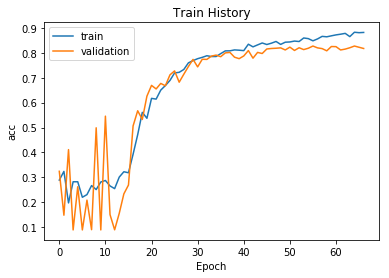

In [3]:
show_plot('acc', train_history_1)

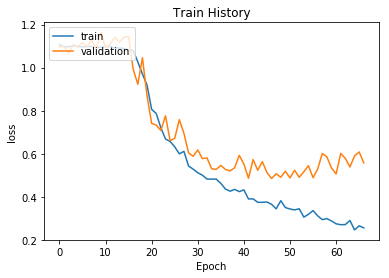

In [4]:
show_plot('loss', train_history_1)

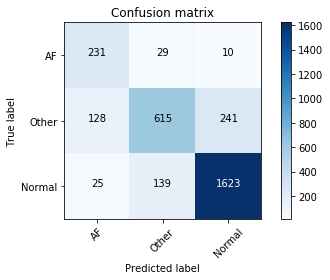

In [6]:
from toolkit import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
test_prediction = model.predict_classes(testData, batch_size=1)
cnf_matrix = confusion_matrix(testL, test_prediction)
plot_confusion_matrix.plot_confusion_matrix(cnf_matrix, classes=['AF','Other','Normal'], save_png=False)

In [7]:
from sklearn.metrics import f1_score
result = f1_score(testL, test_prediction, average=None)
result

array([0.70642202, 0.69609508, 0.88664299])

## Baggingfor 3 classes

In [3]:
for train_index, test_index in kf.split(trainD, trainL):
    print(train_index, len(train_index))
    print(test_index, len(test_index))
    print('===========')

[ 127  128  129 ... 7107 7108 7109] 5687
[   0    1    2 ... 2930 2931 2932] 1423
[   0    1    2 ... 7107 7108 7109] 5687
[ 127  128  129 ... 3765 3766 3767] 1423
[   0    1    2 ... 7107 7108 7109] 5688
[ 254  255  256 ... 4599 4600 4601] 1422
[   0    1    2 ... 7107 7108 7109] 5689
[ 381  382  383 ... 6273 6274 6275] 1421
[   0    1    2 ... 6273 6274 6275] 5689
[5133 5134 5135 ... 7107 7108 7109] 1421


In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, AveragePooling1D, Dropout
from keras.layers import Activation, BatchNormalization
from keras.optimizers import Adam
from keras.utils import np_utils
import tensorflow as tf
from keras.callbacks import TensorBoard, EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
np.set_printoptions(suppress=True)

trainD = np.load("/home/hsiehch/30s/train_data.npy")
trainL = np.load("/home/hsiehch/30s/train_label.npy")
validationD = np.load("/home/hsiehch/30s/validation_data.npy")
validationL = np.load("/home/hsiehch/30s/validation_label.npy")
testD = np.load("/home/hsiehch/30s/test_data.npy")
testL = np.load("/home/hsiehch/30s/test_label.npy")
trainD = np.append(trainD, validationD, axis=0)
trainL = np.append(trainL, validationL, axis=0)

trainData = trainD.reshape((trainD.shape[0], trainD.shape[1], 1))
trainLabel = np_utils.to_categorical(trainL, 4)
testData = testD.reshape((testD.shape[0], testD.shape[1], 1))
testLabel = np_utils.to_categorical(testL, 4)
print('Train Data:', trainData.shape)
print('Train Label: ', trainLabel.shape)
print('Test Data:', testData.shape)
print('Test Label: ', testLabel.shape)

#--------------------------------------------

from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5, shuffle=False)
# print(kf)

#--------------------------------------------

from sklearn.metrics import f1_score

def create_model():
    model = Sequential()
    model.add(Conv1D(filters = 32, kernel_size = 7, input_shape = (9000, 1)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size = 2))

    model.add(Conv1D(filters = 32, kernel_size = 7))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size = 2))

    model.add(Conv1D(filters = 64, kernel_size = 7))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size = 2))

    model.add(Conv1D(filters = 64, kernel_size = 3))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size = 2))

    model.add(Conv1D(filters = 128, kernel_size = 3))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size = 2))

    model.add(Conv1D(filters = 128, kernel_size = 3))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size = 2))
    model.add(Dropout(0.5))

    model.add(Conv1D(filters = 256, kernel_size = 3))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size = 2))

    model.add(Conv1D(filters = 256, kernel_size = 3))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size = 2))
    model.add(Dropout(0.5))

    model.add(Conv1D(filters = 512, kernel_size = 3))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size = 2))
    model.add(Dropout(0.5))

    model.add(Conv1D(filters = 512, kernel_size = 3))
    model.add(Activation('relu'))

    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(4, activation = "softmax"))
    
    model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics=['accuracy'])

    return model

fold = 1
classifiers = []

for train_index, test_index in kf.split(trainD, trainL):
    
    print('{}-Fold'.format(fold))
    model = create_model()
    early_stop = EarlyStopping(patience=20)
    history = model.fit(x = trainData[train_index],
                        y = trainLabel[train_index],
                        epochs=100,
                        validation_data=(trainData[test_index], trainLabel[test_index]),
                        callbacks=[early_stop],
                        batch_size=70, 
                        verbose=0)
    
    classifiers.append(model)
    
    evaluation = model.evaluate(x = trainData[test_index], y = trainLabel[test_index])
    print('Testing:')
    print('Loss: {:.3f}, Accuracy: {:.3f}'.format(evaluation[0], evaluation[1]))
#     test_prediction = model.predict_classes(trainData[test_index], batch_size=1)
#     cnf_matrix = confusion_matrix(trainLabel[test_index].argmax(axis=1), test_prediction)
#     plot_confusion_matrix(cnf_matrix, classes=['AF','Noise','Normal','Other'],
#                       title='Confusion matrix')
    
    validation_prediction = model.predict_classes(trainData[test_index], batch_size=100)
    validation_prediction = np_utils.to_categorical(validation_prediction, 4)
    result = f1_score(trainLabel[test_index], validation_prediction, average=None)
    print('F1-score:')
    print(result)
    
    fold = fold + 1
    del model
    

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train Data: (7110, 9000, 1)
Train Label:  (7110, 4)
Test Data: (3041, 9000, 1)
Test Label:  (3041, 4)
1-Fold
1423/1423 [==============================] - 0s 344us/step
Testing:
Loss: 0.516, Accuracy: 0.818
F1-score:
[0.73846154 0.45070423 0.88952819 0.71814672]
2-Fold
1423/1423 [==============================] - 0s 320us/step
Testing:
Loss: 0.472, Accuracy: 0.844
F1-score:
[0.79835391 0.57471264 0.90448113 0.76097561]
3-Fold
1422/1422 [==============================] - 0s 332us/step
Testing:
Loss: 0.568, Accuracy: 0.839
F1-score:
[0.7768595  0.64       0.90337878 0.7452381 ]
4-Fold
1421/1421 [==============================] - 0s 346us/step
Testing:
Loss: 0.530, Accuracy: 0.828
F1-score:
[0.77042802 0.63366337 0.89775281 0.70170455]
5-Fold
1421/1421 [==============================] - 0s 342us/step
Testing:
Loss: 0.528, Accuracy: 0.816
F1-score:
[0.6779661  0.55421687 0.89786497 0.70379747]


ACC:  0.8464320947056889


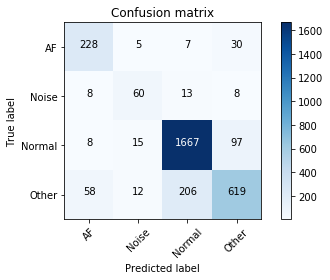

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from toolkit import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

prediction_output = []
for data in testData:
    voting = []
    
    for model in classifiers:
        test_prediction = model.predict_classes(data.reshape((1, 9000, 1)), batch_size=1)
        test_prediction = np_utils.to_categorical(test_prediction, 4)
        voting.append(test_prediction)
    
    voting = np.array(voting)
    sum_of_voting = sum(voting)
    prediction_output.append(sum_of_voting.argmax())

ACC = accuracy_score(testL, prediction_output)
print('ACC: ', ACC)
# LOSS = log_loss(testL, prediction_output)
# print('LOSS: ', LOSS)

cnf_matrix = confusion_matrix(testL, prediction_output)
plot_confusion_matrix.plot_confusion_matrix(cnf_matrix, classes=['AF','Noise','Normal','Other'], save_png=False)

In [9]:
pre_output_cate = np_utils.to_categorical(prediction_output, 4)
f1 = f1_score(testLabel, pre_output_cate, average=None)
print('AF: {}, ~: {}, N: {}, O: {}'.format(f1[0],f1[1],f1[2],f1[3]))

AF: 0.7972027972027972, ~: 0.6629834254143646, N: 0.9059782608695651, O: 0.750758035172832
